In [10]:
#Importing libraries

import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)

In [11]:
#Read Yelp Data file

data = pd.read_csv('yelp_data.csv',encoding="cp1252")

In [12]:
#Review Yelp data's head

data.head()

,Business - Monday Close,Business - Saturday Close,Business - Friday Open,Business - Saturday Open,Business - Monday Open,Business - Sunday Close,Business - Sunday Open,Business - Wednesday Close,Business - Thursday Close,Business - Wednesday Open,Business - Thursday Open,Business - Tuesday Close,Business - Tuesday Open,Business - Restaurant?,User - Years Elite,Business - Friday Close,Number of Records,Business - Accepts Credit Cards,Business - Accepts Insurance,Business - Ages Allowed,Business - Alcohol,Business - Attire,Business - BYOB/Corkage,Business - BYOB,Business - By Appointment Only,Business - Caters,Business - Coat Check,Business - Corkage,Business - Delivery,Business - Dietary Restrictions,Business - Dogs Allowed,Business - Drive-Thru,Business - Good For Dancing,Business - Good For Groups,Business - Good For Kids,Business - Good for Kids,Business - Happy Hour,Business - Has TV,Business - Noise Level,Business - Open 24 Hours,Business - Order at Counter,Business - Outdoor Seating,Business - Parking,Business - Payment Types,Business - Price Range,Business - Smoking,Business - Take-out,Business - Takes Reservations,Business - Waiter Service,Business - Wheelchair Accessible,Business - Wi-Fi,User - Average Stars,Business - Id,Business - Categories,Business - City,User - Compliments Cool,User - Compliments Cute,User - Compliments Funny,User - Compliments Hot,User - Compliments List,User - Compliments More,User - Compliments Note,User - Compliments Photos,User - Compliments Plain,User - Compliments Profile,User - Compliments Writer,Review - Date,User - Fans,Business - Address,Latitude,Longitude,User - Name,Business - Name,Business - Neighborhoods,Business - Open?,User - Review Count,Business - Review Count,Review - Id,Business - Stars,Review - Stars,Business - State,User - Id,User - Votes Cool,Review - Votes Cool,User - Votes Funny,Review - Votes Funny,User - Votes Useful,Review - Votes Useful,User - Yelping Since
0,21:00,21:30,11:00,11:00,11:00,21:00,11:00,21:00,21:00,11:00,11:00,21:00,11:00,True,NaN,21:30,1,True,NaN,NaN,beer_and_wine,casual,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,True,NaN,True,NaN,False,loud,NaN,NaN,True,"{u'garage': False, u'street': False, u'validat...",NaN,1.0,NaN,True,False,False,True,no,4.00,ghzksdgNztTZA49PqMvPkA,"Gluten-Free,Asian Fusion,Chinese,Restaurants",Gilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/1/2005,0,"1084 S Gilbert\nSuite 601\nGilbert, AZ 85296",33.330011,-111.790909,Carl,Pei Wei Asian Diner,NaN,True,1,36,xSaWTOB24fK69MDNcjyuOg,3.5,4,AZ,gKhJyiCKkG6dHPNhr3dhDQ,0,0,0,0,0,0,2004-10
1,21:00,22:30,11:00,11:00,11:00,21:30,11:00,21:00,21:00,11:00,11:00,21:00,11:00,True,NaN,22:30,1,True,NaN,NaN,full_bar,casual,NaN,NaN,NaN,True,NaN,NaN,False,NaN,NaN,NaN,NaN,True,NaN,True,NaN,False,average,NaN,NaN,False,"{u'garage': False, u'street': False, u'validat...",NaN,2.0,NaN,True,False,True,True,no,3.80,hrOsdyai-9B91cGjBspHqw,"Chinese,Restaurants",Chandler,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,4.0,1.0,1.0,3/7/2005,4,"2050 N Alma School Rd\nChandler, AZ 85224",33.335842,-111.859086,Andy,Tao Garden,NaN,True,192,55,I6Snobdz2kX_sqmzi-1K5A,4.0,3,AZ,kJc9YBRwmmZ_PG0uLHuEPQ,109,0,232,0,196,0,2005-02
2,21:00,22:00,11:00,11:00,11:00,NaN,NaN,22:00,22:00,11:00,11:00,22:00,11:00,True,2006,22:00,1,True,NaN,NaN,beer_and_wine,casual,no,False,NaN,False,NaN,False,False,NaN,NaN,NaN,NaN,False,False,False,NaN,False,average,False,True,False,"{u'garage': True, u'street': True, u'validated...",NaN,2.0,NaN,False,False,True,True,no,3.55,VVeogjZya58oiTxK7qUjAQ,"Italian,Pizza,Sandwiches,Restaurants",Phoenix,9.0,1.0,NaN,NaN,NaN,1.0,2.0,2.0,9.0,1.0,6.0,3/8/2005,2,"623 E Adams St\nPhoenix, AZ 85004",33.449233,-112.065458,Philip,Pizzeria Bianco,NaN,True,236,1289,KAYl3n-kUO7USLOMiywdDQ,4.0,5,AZ,K4FAia2Iy5MVnmBLfS-mCg,82,3,58,0,138,0,2005-01
3,22:00,23:00,11:00,11:00,11:00,22:00,16:30,22:00,22:00,11:00,11:00,22:00,11:00,True,2005 2006 2007,23:00,1,True,NaN,NaN,full_bar,dressy,no,NaN,NaN,False,True,NaN,False,NaN,NaN,NaN,NaN,True

In [13]:
#Review Yelp data's tail

data.tail()

,Business - Monday Close,Business - Saturday Close,Business - Friday Open,Business - Saturday Open,Business - Monday Open,Business - Sunday Close,Business - Sunday Open,Business - Wednesday Close,Business - Thursday Close,Business - Wednesday Open,Business - Thursday Open,Business - Tuesday Close,Business - Tuesday Open,Business - Restaurant?,User - Years Elite,Business - Friday Close,Number of Records,Business - Accepts Credit Cards,Business - Accepts Insurance,Business - Ages Allowed,Business - Alcohol,Business - Attire,Business - BYOB/Corkage,Business - BYOB,Business - By Appointment Only,Business - Caters,Business - Coat Check,Business - Corkage,Business - Delivery,Business - Dietary Restrictions,Business - Dogs Allowed,Business - Drive-Thru,Business - Good For Dancing,Business - Good For Groups,Business - Good For Kids,Business - Good for Kids,Business - Happy Hour,Business - Has TV,Business - Noise Level,Business - Open 24 Hours,Business - Order at Counter,Business - Outdoor Seating,Business - Parking,Business - Payment Types,Business - Price Range,Business - Smoking,Business - Take-out,Business - Takes Reservations,Business - Waiter Service,Business - Wheelchair Accessible,Business - Wi-Fi,User - Average Stars,Business - Id,Business - Categories,Business - City,User - Compliments Cool,User - Compliments Cute,User - Compliments Funny,User - Compliments Hot,User - Compliments List,User - Compliments More,User - Compliments Note,User - Compliments Photos,User - Compliments Plain,User - Compliments Profile,User - Compliments Writer,Review - Date,User - Fans,Business - Address,Latitude,Longitude,User - Name,Business - Name,Business - Neighborhoods,Business - Open?,User - Review Count,Business - Review Count,Review - Id,Business - Stars,Review - Stars,Business - State,User - Id,User - Votes Cool,Review - Votes Cool,User - Votes Funny,Review - Votes Funny,User - Votes Useful,Review - Votes Useful,User - Yelping Since
285759,21:00,21:00,6:00,7:00,6:00,20:00,7:00,21:00,21:00,6:00,6:00,21:00,6:00,True,NaN,21:00,1,True,NaN,NaN,none,casual,yes_free,False,NaN,True,NaN,False,False,"{u'dairy-free': False, u'gluten-free': False, ...",NaN,NaN,NaN,True,True,True,NaN,False,average,NaN,NaN,True,"{u'garage': False, u'street': False, u'validat...",NaN,2.0,NaN,True,False,False,True,free,2.77,ojjtPlnSmCX1zCzWL7JoNQ,"Bakeries,Food,Breakfast & Brunch,Sandwiches,Re...",Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/16/2014,0,"4290 E Indian School Rd\nPhoenix, AZ 85018",33.495642,-111.989069,Jim,The Wildflower Bread Company,NaN,True,13,111,4AmzRHaVb2U1m6bQDZyTuw,4.0,2,AZ,VbUG2LDbU0-Indor_T6V0g,0,0,1,0,10,0,2013-02
285760,21:00,21:00,6:00,7:00,6:00,21:00,7:00,21:00,21:00,6:00,6:00,21:00,6:00,True,NaN,21:00,1,True,NaN,NaN,full_bar,casual,yes_free,False,NaN,True,NaN,False,False,NaN,NaN,NaN,NaN,True,True,True,NaN,True,average,NaN,NaN,True,"{u'garage': False, u'street': False, u'validat...",NaN,2.0,NaN,True,True,True,True,no,3.67,0K634ehk41ZRc4kj3NTAEQ,"Food,Breakfast & Brunch,Bagels,Delis,Restaurants",Tempe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7/16/2014,1,"1160 E University Dr\nTempe, AZ 85281",33.422413,-111.919903,Gina,Chompie's Deli,NaN,True,13,316,mOVR0cOK_kjMmFgUC6jCzQ,3.5,5,AZ,BZ4OhVIIS1LSAVvnb3q9fg,2,0,1,0,11,0,2013-11
285761,21:00,21:00,11:00,11:00,11:00,21:00,11:00,21:00,21:00,11:00,11:00,21:00,11:00,True,NaN,21:00,1,True,NaN,NaN,none,casual,no,False,NaN,True,NaN,False,True,NaN,True,NaN,NaN,True,True,True,NaN,False,average,NaN,NaN,True,"{u'garage': False, u'street': True, u'validate...",NaN,2.0,NaN,True,False,False,True,free,4.00,5VMajxduxfLPSyQkVFKESg,"Barbeque,Restaurants",Gilbert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/16/2014,0,"301 N Gilbert Rd\nGilbert, AZ 85234",33.355034,-111.789279,Laura,Joe's Real BBQ,NaN,True,1,500,ctGqaIybumGGPDSkQbwYcw,4.0,4,AZ,VC6INuOu-oiHJC6sfiik1g,0,0,0,0,0,0,2014-07
285762,0:00,1:00,11:00,10:00,11:00,0:00,10:00,0:00,0:00,11:00,11:00,0:00,11:00,True,NaN,1:00,1,True,NaN,NaN,full_bar,casual,y

In [15]:
#List all the columns which are features of the data set

data.columns

Index(['Business - Monday Close', 'Business - Saturday Close',
       'Business - Friday Open', 'Business - Saturday Open',
       'Business - Monday Open', 'Business - Sunday Close',
       'Business - Sunday Open', 'Business - Wednesday Close',
       'Business - Thursday Close', 'Business - Wednesday Open',
       'Business - Thursday Open', 'Business - Tuesday Close',
       'Business - Tuesday Open', 'Business - Restaurant?',
       'User - Years Elite', 'Business - Friday Close', 'Number of Records',
       'Business - Accepts Credit Cards', 'Business - Accepts Insurance',
       'Business - Ages Allowed', 'Business - Alcohol', 'Business - Attire',
       'Business - BYOB/Corkage', 'Business - BYOB',
       'Business - By Appointment Only', 'Business - Caters',
       'Business - Coat Check', 'Business - Corkage', 'Business - Delivery',
       'Business - Dietary Restrictions', 'Business - Dogs Allowed',
       'Business - Drive-Thru', 'Business - Good For Dancing',
       'Busin

In [16]:
#Identify the number of rows and columns in data set

data.shape

(285764, 89)

In [13]:
#Identify all the null values in the data set

data.isnull().sum().sort_values(ascending=False)

Business - Neighborhoods           285764
Business - Accepts Insurance       285764
Business - Ages Allowed            285285
Business - By Appointment Only     285217
Business - Payment Types           283638
Business - Dietary Restrictions    279849
Business - Open 24 Hours           267126
Business - Order at Counter        262516
Business - Drive-Thru              260833
User - Compliments List            249757
Business - Corkage                 248979
User - Compliments Profile         243125
Business - BYOB                    238446
Business - Good For Dancing        238423
Business - Coat Check              237778
Business - Smoking                 237681
Business - Happy Hour              235807
Business - Dogs Allowed            230922
User - Compliments Cute            229141
User - Compliments Photos          223057
Business - BYOB/Corkage            216729
User - Years Elite                 216140
User - Compliments More            204195
Business - Good For Kids          

In [17]:
#Are all business ID's unique?

data['Business - Id'].is_unique

False

In [18]:
#How many restaurants are there per city?

data['Business - City'].value_counts()

Phoenix                      108261
Scottsdale                    57462
Tempe                         31296
Chandler                      20222
Mesa                          17795
Gilbert                       12598
Glendale                      11542
Peoria                         5348
Surprise                       3308
Goodyear                       2905
Avondale                       2238
Cave Creek                     2221
Queen Creek                    1864
Paradise Valley                1054
Fountain Hills                  874
Casa Grande                     736
Litchfield Park                 691
Apache Junction                 564
Anthem                          542
Maricopa                        504
Buckeye                         405
Sun City                        386
Wickenburg                      338
Laveen                          284
Tolleson                        264
Carefree                        250
San Tan Valley                  208
Ahwatukee                   

In [19]:
#What are the most reviewed restaurants in Phoenix?

data[['Business - Name', 'Business - Review Count', 'Business - City', 'Business - Stars']].sort_values(ascending=False, by="Business - Review Count")[0:1500]

,Business - Name,Business - Review Count,Business - City,Business - Stars
152348,Pizzeria Bianco,1289,Phoenix,4.0
105968,Pizzeria Bianco,1289,Phoenix,4.0
251828,Pizzeria Bianco,1289,Phoenix,4.0
251827,Pizzeria Bianco,1289,Phoenix,4.0
974,Pizzeria Bianco,1289,Phoenix,4.0
63479,Pizzeria Bianco,1289,Phoenix,4.0
227046,Pizzeria Bianco,1289,Phoenix,4.0
43759,Pizzeria Bianco,1289,Phoenix,4.0
7013,Pizzeria Bianco,1289,Phoenix,4.0
22660,Pizzeria Bianco,1289,Phoenix,4.0


Text(0.5,1,'Top 50 cities by business listed')

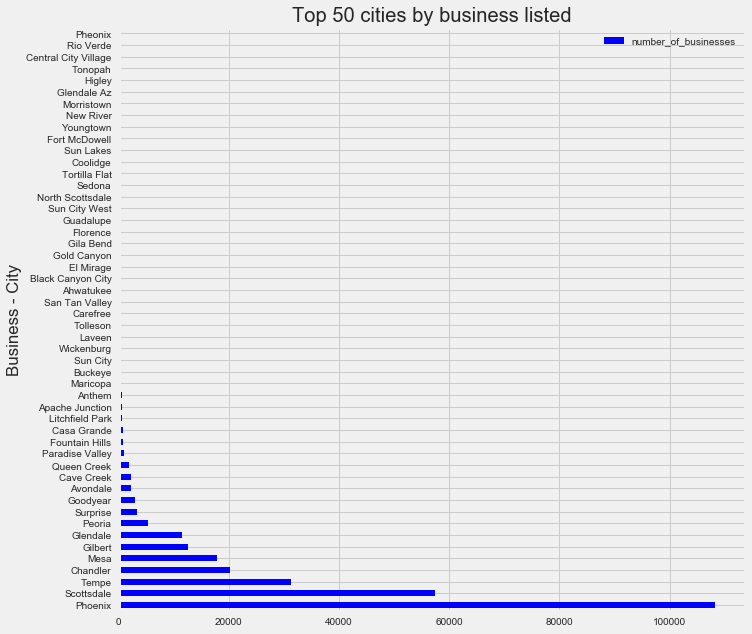

In [20]:
#What is the number of businesses listed in different cities?

city_business_counts = data[['Business - City', 'Business - Id']].groupby (['Business - City'])\
['Business - Id'].agg('count').sort_values(ascending=False)
city_business_counts = pd.DataFrame(data=city_business_counts)
city_business_counts.rename(columns={'Business - Id' : 'number_of_businesses'}, inplace=True)
city_business_counts[0:50].sort_values(ascending=False, by="number_of_businesses")\
.plot(kind='barh', stacked=False, figsize=[10,10], colormap='winter')
plt.title('Top 50 cities by business listed')

In [8]:
#Cities with the most reviews and best rating for their businesses

city_business_reviews = data[['Business - City', 'Business - Review Count', 'Business - Stars']].groupby(['Business - City']).\
agg({'Business - Review Count': 'sum', 'Business - Stars': 'mean'}).sort_values(by='Business - Review Count', ascending=False)
city_business_reviews.head(15)

,Business - Review Count,Business - Stars
Business - City,,
Phoenix,25703786,3.800482
Scottsdale,12461310,3.784527
Tempe,6905167,3.714037
Chandler,2391501,3.666180
Gilbert,2242233,3.778973
Mesa,1735055,3.738691
Glendale,1074279,3.596604
Peoria,367968,3.557592
Cave Creek,216800,3.756866


Text(0.5,1,'Top 50 cities by Reviews')

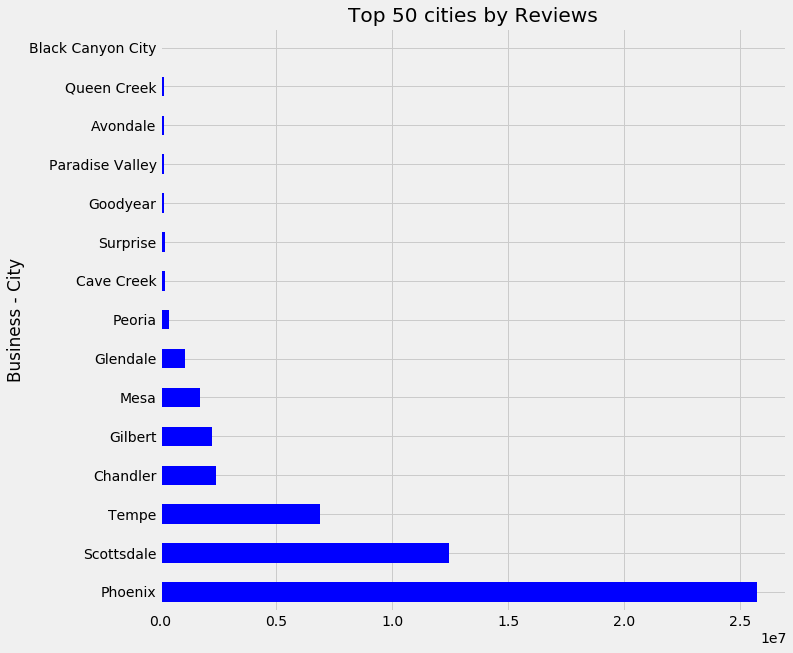

In [44]:
#Cities with the most reviews and best rating for their businesses - visual

city_business_reviews['Business - Review Count'][0:15].plot(kind='barh', stacked=False, figsize=[10,10],\
                                                           colormap='winter')
plt.title('Top 50 cities by Reviews')

In [45]:
#Distribution of Stars
data['Business - Stars'].value_counts()

4.0    122665
3.5     82384
4.5     36845
3.0     31441
2.5      8297
2.0      2431
5.0       838
1.5       786
1.0        77
Name: Business - Stars, dtype: int64

In [61]:
#Picking a 5.0 rated restaurant in Phoenix
data[(data['Business - City'] == 'Phoenix') & (data['Business - Stars'] == 5.0)]

,Business - Monday Close,Business - Saturday Close,Business - Friday Open,Business - Saturday Open,Business - Monday Open,Business - Sunday Close,Business - Sunday Open,Business - Wednesday Close,Business - Thursday Close,Business - Wednesday Open,Business - Thursday Open,Business - Tuesday Close,Business - Tuesday Open,Business - Restaurant?,User - Years Elite,Business - Friday Close,Number of Records,Business - Accepts Credit Cards,Business - Accepts Insurance,Business - Ages Allowed,Business - Alcohol,Business - Attire,Business - BYOB/Corkage,Business - BYOB,Business - By Appointment Only,Business - Caters,Business - Coat Check,Business - Corkage,Business - Delivery,Business - Dietary Restrictions,Business - Dogs Allowed,Business - Drive-Thru,Business - Good For Dancing,Business - Good For Groups,Business - Good For Kids,Business - Good for Kids,Business - Happy Hour,Business - Has TV,Business - Noise Level,Business - Open 24 Hours,Business - Order at Counter,Business - Outdoor Seating,Business - Parking,Business - Payment Types,Business - Price Range,Business - Smoking,Business - Take-out,Business - Takes Reservations,Business - Waiter Service,Business - Wheelchair Accessible,Business - Wi-Fi,User - Average Stars,Business - Id,Business - Categories,Business - City,User - Compliments Cool,User - Compliments Cute,User - Compliments Funny,User - Compliments Hot,User - Compliments List,User - Compliments More,User - Compliments Note,User - Compliments Photos,User - Compliments Plain,User - Compliments Profile,User - Compliments Writer,Review - Date,User - Fans,Business - Address,Latitude,Longitude,User - Name,Business - Name,Business - Neighborhoods,Business - Open?,User - Review Count,Business - Review Count,Review - Id,Business - Stars,Review - Stars,Business - State,User - Id,User - Votes Cool,Review - Votes Cool,User - Votes Funny,Review - Votes Funny,User - Votes Useful,Review - Votes Useful,User - Yelping Since
18079,NaN,4:00,21:00,21:00,NaN,2:00,14:00,NaN,4:00,NaN,21:00,NaN,NaN,True,2009 2010,4:00,1,False,NaN,NaN,none,casual,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,NaN,False,NaN,True,loud,NaN,NaN,True,"{u'garage': False, u'street': False, u'validat...",NaN,1.0,NaN,True,False,False,True,no,3.61,-j3BF7gOIi-1tAHoFA3WIw,"Mexican,Food Stands,Restaurants",Phoenix,53.0,5.0,18.0,22.0,3.0,1.0,26.0,6.0,21.0,NaN,7.0,4/21/2009,6,Charlie's Phoenix\n727 W Camelback Rd\nPhoenix...,33.508834,-112.083991,Braedy,La Parilla Villa Catering,NaN,True,159,18,SBisu9JWb-aP80JnVb_JWA,5.0,5,AZ,HY9qpAamqLXFoa7xMwNntg,318,1,328,1,478,2,2008-12
19949,17:00,13:00,9:00,9:00,9:00,NaN,NaN,17:00,17:00,9:00,9:00,17:00,9:00,True,NaN,17:00,1,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.19,bcxb83VBtvOGmo6D1Xst_w,"Food Delivery Services,Personal Chefs,Food,Glu...",Phoenix,13.0,1.0,7.0,6.0,NaN,1.0,4.0,NaN,30.0,1.0,7.0,6/5/2009,10,"811 W Deer Valley Rd\nPhoenix, AZ 85027",33.683345,-112.084629,Crystal,Sunfare,NaN,True,101,11,Ttr5g3-hGjrdPzdBJ5LIbg,5.0,5,AZ,nMVRRV6Iu-2YODo9bPELGA,131,1,191,1,291,3,2008-08
20129,NaN,4:00,21:00,21:00,NaN,2:00,14:00,NaN,4:00,NaN,21:00,NaN,NaN,True,NaN,4:00,1,False,NaN,NaN,none,casual,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,NaN,False,NaN,True,loud,NaN,NaN,True,"{u'garage': False, u'street': False, u'validat...",NaN,1.0,NaN,True,False,False,True,no,4.37,-j3BF7gOIi-1tAHoFA3WIw,"Mexican,Food Stands,Restaurants",Phoenix,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6/9/2009,0,Charlie's Phoenix\n727 W Camelback Rd\nPhoenix...,33.508834,-112.083991,Khi,La Parilla Villa Catering,NaN,True,18,18,fmN8ys1rjQ04kTwta2RHBw,5.0,5,AZ,3VgHutPPmF3TbWwIzlSNCA,37,2,26,3,38,2,2008-09
23413,NaN,4:00,21:00,21:00,NaN,2:00,14:00,NaN,4:00,NaN,21:00,NaN,NaN,True,NaN,4:00,1,False,NaN,NaN,none,casual,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,NaN,False,NaN,True,loud,NaN,NaN,True,"{u'garage': False, u'street': False, u'validat...",NaN,1.0,NaN,

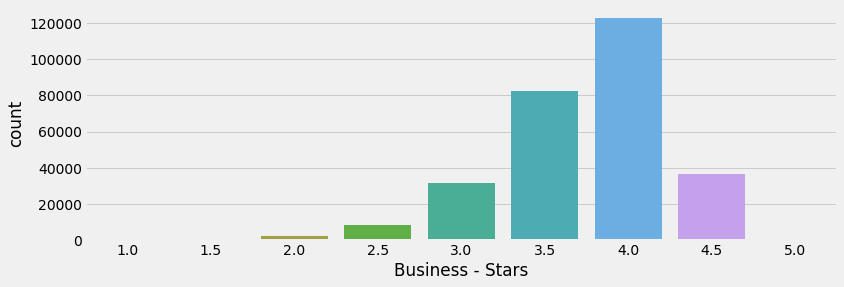

In [67]:
#Distribution of Stars - Visusal
sns.countplot(x='Business - Stars', data=data);

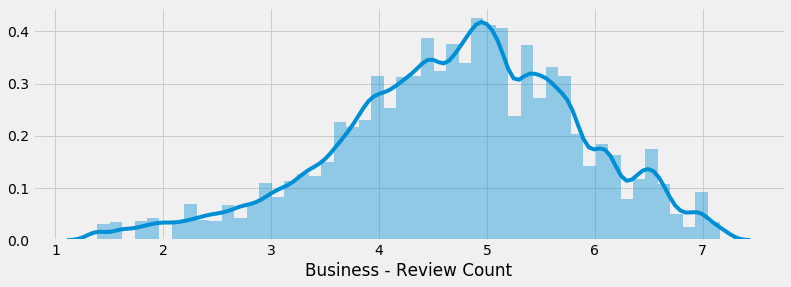

In [68]:
#Distribution of the number of review - Visual
sns.distplot(data['Business - Review Count'].apply(np.log1p))

In [70]:
#Top Cuisines

data['Business - Categories'].value_counts()

Mexican,Restaurants                                                               25856
American (New),Restaurants                                                         8941
Chinese,Restaurants                                                                7975
Pizza,Restaurants                                                                  7165
Restaurants,Italian                                                                7037
American (Traditional),Restaurants                                                 6767
Italian,Pizza,Restaurants                                                          5327
Thai,Restaurants                                                                   5279
Sushi Bars,Japanese,Restaurants                                                    5239
Breakfast & Brunch,Restaurants                                                     4475
Italian,Pizza,Sandwiches,Restaurants                                               4469
Sandwiches,Restaurants          

In [73]:
#Summary of user reviews


In [74]:
# Distribution of price range
data['Business - Price Range'].value_counts()

2.0    178471
1.0     87729
3.0     14990
4.0      3247
Name: Business - Price Range, dtype: int64

In [77]:
#Business Star by Price
city_business_reviews = data[['Business - City', 'Business - Review Count', 'Business - Stars', 'Business - Price Range']].groupby(['Business - City']).\
agg({'Business - Review Count': 'sum', 'Business - Stars': 'mean', 'Business - Price Range': 'mean'}).sort_values(by='Business - Review Count', ascending=False)
city_business_reviews.head(5)

,Business - Review Count,Business - Stars,Business - Price Range
Business - City,,,
Phoenix,25703786,3.800482,1.743171
Scottsdale,12461310,3.784527,2.036175
Tempe,6905167,3.714037,1.608412
Chandler,2391501,3.666180,1.688137
Gilbert,2242233,3.778973,1.687625


In [5]:
pandas_profiling.ProfileReport(data)

Number of variables,89
Number of observations,285764
Total Missing (%),26.9%
Total size in memory,190.2 MiB
Average record size in memory,698.0 B
Numeric,19
Categorical,57
Boolean,0
Date,0
Text (Unique),0
Rejected,13


In [27]:
#Business Star by User Compliments Hot
city_user_compliments = data[['Business - City', 'User - Compliments Hot', 'Business - Stars']].groupby(['Business - City']).\
agg({'User - Compliments Hot': 'mean' , 'Business - Stars': 'mean'}).sort_values(by='Business - Stars', ascending=False)
city_user_compliments.head(5)

,User - Compliments Hot,Business - Stars
Business - City,,
Ahwatukee,33.701493,4.000000
Glendale Az,15.500000,4.000000
North Scottsdale,40.600000,4.000000
Anthem,67.895652,3.951107
Sun Lakes,72.058824,3.860465


In [29]:
data['Business - Delivery'].value_counts()

False    249806
True      33170
Name: Business - Delivery, dtype: int64

In [34]:
restaurant_delivery = data[['Business - Delivery', 'Business - Stars']].groupby(['Business - Delivery']).\
agg({'Business - Stars': 'mean'}).sort_values(by='Business - Stars', ascending=False)
restaurant_delivery.head(2)

,Business - Stars
Business - Delivery,
False,3.761697
True,3.659361
